In [32]:
from tensorflow.keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
class SoftmaxRegression:
    def __init__(self):
        pass
    
    def initialize_param(self,d):
        np.random.seed(1)
        params = {}
        params['w'] = np.random.randn(d,5)/np.sqrt(d)
        params['b'] = np.zeros((5,1))
        return params
    
    def softmax(self,Z):
        expZ = np.exp(Z - np.max(Z))
        return expZ / expZ.sum(axis=0, keepdims=True)

    def forward(self, params, X):
        w = params['w']
        b = params['b']
        Z = np.dot(w.T,X) + b
        A = self.softmax(Z)
        return A

    def compute_cost(self,A,Y):
        m = Y.shape[1]
        cost = (-1/m)*np.sum(Y * np.log(A + 1e-8))
        return cost

    def backprop(self,X, Y, A):
        m = Y.shape[1]
        dw = (1/m) * np.dot(X, (A - Y).T)
        db = (1/m) * np.sum(A - Y)
        return dw, db

    def optimise(self, params, X, Y, num_iterations, l_rate):
        costs = []
        for i in range(num_iterations):
            A = self.forward(params, X)
            cost = self.compute_cost(A, Y)
            dw, db = self.backprop(X, Y, A)

            params['w'] = params['w'] - l_rate * dw
            params['b'] = params['b'] - l_rate * db

            if i % 100 == 0:
                print("Cost after iteration %i : %f " %(i, cost))

            costs.append(cost)
        return params, costs

    def predict(self,params, X, Y):
        w = params['w']
        #print(w.shape,X.shape)
        probs = self.forward(params,X)
        y_hat = np.argmax(probs, axis=0)
        Y = np.argmax(Y, axis=0)
        conf_matrix=self.compute_confusion_matrix(Y, y_hat)
        print("label precision recall")
        for label in range(5):
            print(f"{label:5d} {self.precision(label, conf_matrix):9.3f} {self.recall(label, conf_matrix):6.3f}")

        accuracy = self.accuracy(conf_matrix)
        print("Test Accuracy: ",accuracy)        
        return conf_matrix

    def model(self,d, X_train, Y_train, num_interation, l_rate):
        params = self.initialize_param(d)
        params, costs = self.optimise(params, X_train, Y_train, num_interation, l_rate)
        return params, costs
    
    def compute_confusion_matrix(self,true, pred):
        K = len(np.unique(true)) # Number of classes 
        result = np.zeros((K, K))
        for i in range(len(true)):
            result[true[i]][pred[i]] += 1
        return result

    def precision(self,label, confusion_matrix):
        col = confusion_matrix[:, label]
        return confusion_matrix[label, label] / col.sum()

    def recall(self,label, confusion_matrix):
        row = confusion_matrix[label, :]
        return confusion_matrix[label, label] / row.sum()
    
    def accuracy(self,confusion_matrix):
        diagonal_sum = confusion_matrix.trace()
        sum_of_all_elements = confusion_matrix.sum()
        return diagonal_sum / sum_of_all_elements

In [35]:
def main():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
    x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

    X_TRAIN=[]
    Y_TRAIN=[]
    for i in range(len(y_train)):
        if y_train[i]<5:
            X_TRAIN.append(x_train[i])
            Y_TRAIN.append(y_train[i])

    X_TEST=[]
    Y_TEST=[]
    for i in range(len(y_test)):
        if y_test[i]<5:
            X_TEST.append(x_test[i])
            Y_TEST.append(y_test[i])

    X_TRAIN=np.array(X_TRAIN)
    Y_TRAIN=np.array(Y_TRAIN)

    X_TEST=np.array(X_TEST)
    Y_TEST=np.array(Y_TEST)
    Y_Train = np.zeros((len(Y_TRAIN),5))
    for i in range(len(Y_TRAIN)):
        Y_Train[i,Y_TRAIN[i]] = 1

    Y_Test = np.zeros((len(Y_TEST),5))
    for j in range(len(Y_TEST)):
        Y_Test[j,Y_TEST[j]] = 1
    XX_train = X_TRAIN.astype('float32') / 255.
    XX_test = X_TEST.astype('float32') / 255.
    XX_train = XX_train.T
    XX_test =XX_test.T
    Y_train = Y_Train.T
    Y_test = Y_Test.T
    regressor = SoftmaxRegression()
    params, costs = regressor.model(XX_train.shape[0], XX_train, Y_train, 10000, 0.6)
    plt.plot(range(len(costs)),costs)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Costs vs iterations")
    print("Confusion Matrix: ",regressor.predict(params, XX_test, Y_test))

Cost after iteration 0 : 1.725826 
Cost after iteration 100 : 0.130053 
Cost after iteration 200 : 0.116001 
Cost after iteration 300 : 0.109555 
Cost after iteration 400 : 0.105554 
Cost after iteration 500 : 0.102705 
Cost after iteration 600 : 0.100515 
Cost after iteration 700 : 0.098748 
Cost after iteration 800 : 0.097273 
Cost after iteration 900 : 0.096012 
Cost after iteration 1000 : 0.094914 
Cost after iteration 1100 : 0.093943 
Cost after iteration 1200 : 0.093074 
Cost after iteration 1300 : 0.092289 
Cost after iteration 1400 : 0.091574 
Cost after iteration 1500 : 0.090918 
Cost after iteration 1600 : 0.090312 
Cost after iteration 1700 : 0.089750 
Cost after iteration 1800 : 0.089226 
Cost after iteration 1900 : 0.088735 
Cost after iteration 2000 : 0.088273 
Cost after iteration 2100 : 0.087838 
Cost after iteration 2200 : 0.087426 
Cost after iteration 2300 : 0.087034 
Cost after iteration 2400 : 0.086663 
Cost after iteration 2500 : 0.086308 
Cost after iteration 260

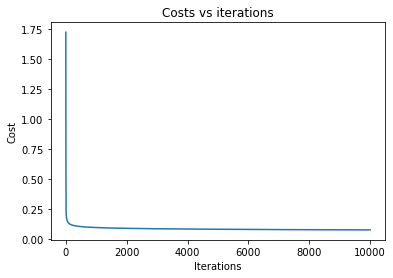

In [36]:
if __name__ == '__main__':

    main()